# Feature Engineering - Part A

### 1. [Tutorial links](#tutorials)
### 2. [Duplicate observations and features elimination](#dup_rows)
### 3. [Null Value (NaN/ NA) elimination](#null_values)
### 4. [Impute missing values (NaN/ NA)](#miss_values)

## <a id='tutorials'>1. Tutorial links</a>

### Load libraries

In [50]:
# Import pandas library
import pandas as pd

# Import numpy library
import numpy as np

# Import seaborn (for plotting graphs and charts)
import seaborn as sns

#!pip install missingno
import missingno as msno

# Ignore warnings, if any
import warnings
warnings.filterwarnings('ignore')

# Import matplot library
import matplotlib.pyplot as plt
%matplotlib inline

# Import math
import math

# Import seaborn
import seaborn as sns

### Load CSV file from Github/local and print its shape 

In [51]:
# Load vehicle data set from Github
##### How to load a file from github directly ####
loan_data = pd.read_csv("https://raw.githubusercontent.com/socratesk/YHatSchoolOfAI/master/data/LoanPrediction.csv")

#loan_data = pd.read_csv("data/LoanPrediction.csv")

# Print the shape
print (loan_data.shape)

(614, 13)


In [52]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## <a id='dup_rows'>2. Duplicate observations (rows) and features (columns) elimination</a>

### *****Introduce duplicates to visualize how the duplicate elimination works (NOT APPLICABLE in real-time) - Starts*****

#### Create some duplicate observations from existing dataframe 

In [53]:
# Choose 4 random observations from existing dataframe
noisy_rows = loan_data.sample(4, replace=False)
noisy_rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
390,LP002255,Male,No,3+,Graduate,No,9167,0.0,185.0,360.0,1.0,Rural,Y
132,LP001478,Male,No,0,Graduate,No,2718,0.0,70.0,360.0,1.0,Semiurban,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
331,LP002098,Male,No,0,Graduate,No,2935,0.0,98.0,360.0,1.0,Semiurban,Y


### Question - Which command will make the `sample` produce constant set of 4 rows always?

#### Append the duplicate observations  

In [54]:
loan_data = loan_data.append(noisy_rows)
loan_data.shape

(618, 13)

#### Introducing duplicate features from existing columns

In [55]:
# Create new features from 'Application Income' and 'Education'
loan_data['ApplicantIncome_dup'] = loan_data['ApplicantIncome']
loan_data['Education_dup'] = loan_data['Education']
loan_data.shape

(618, 15)

### *****Introduce duplicates to visualize how the duplicate elimination works (NOT APPLICABLE in real-time) - Ends*****

### Identify whether the dataframe has duplicate observations (rows)

In [24]:
loan_data[loan_data.duplicated(keep=False)]  # Possible 'keep' values: "first", "last", or False (NO QUOTES for False)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_dup,Education_dup
10,LP001024,Male,Yes,2,Graduate,No,3200,700,70,360,1,Urban,Y,3200,Graduate
62,LP001207,Male,Yes,0,Not Graduate,Yes,2609,3449,165,180,0,Rural,N,2609,Not Graduate
75,LP001255,Male,No,0,Graduate,No,3750,0,113,480,1,Urban,N,3750,Graduate
154,LP001535,Male,No,0,Graduate,No,3254,0,50,360,1,Urban,Y,3254,Graduate
418,LP002345,Male,Yes,0,Graduate,No,1025,2773,112,360,1,Rural,Y,1025,Graduate
424,LP002364,Male,Yes,0,Graduate,No,14880,0,96,360,1,Semiurban,Y,14880,Graduate
539,LP002740,Male,Yes,3+,Graduate,No,6417,0,157,180,1,Rural,Y,6417,Graduate
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792,155,360,1,Rural,Y,2894,Not Graduate
539,LP002740,Male,Yes,3+,Graduate,No,6417,0,157,180,1,Rural,Y,6417,Graduate
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792,155,360,1,Rural,Y,2894,Not Graduate


### Identify whether the dataframe has repeated/ duplicate features (columns)  

In [56]:
# Note: There is no direct way to identify the duplicate columns in Python.
# So, we are taking the "Transpose" of the dataframe [remember Transpose matrix?] and trying to find the duplicates.
loan_data.T[loan_data.T.duplicated(keep=False)]

,0,1,2,3,4,5,6,7,8,9,...,608,609,610,611,612,613,390,132,2,331
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,...,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate
ApplicantIncome,5849,4583,3000,2583,6000,5417,2333,3036,4006,12841,...,3232,2900,4106,8072,7583,4583,9167,2718,3000,2935
ApplicantIncome_dup,5849,4583,3000,2583,6000,5417,2333,3036,4006,12841,...,3232,2900,4106,8072,7583,4583,9167,2718,3000,2935
Education_dup,Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,...,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate


### Drop the duplicate features (columns) from dataframe 

In [25]:
print ("Before eliminating duplicate columns - shape: " + str(loan_data.shape))
loan_data = loan_data.T.drop_duplicates().T    # Note that inplace=True will not work. Try it yourself
print ("After eliminating duplicate columns - shape: " + str(loan_data.shape))

Before eliminating duplicate columns - shape: (622, 15)
After eliminating duplicate columns - shape: (622, 13)


### Drop the duplicate observations  (rows) from dataframe 

In [26]:
print ("Before eliminating duplicate rows - shape: " + str(loan_data.shape))
loan_data.drop_duplicates(inplace=True)
print ("After eliminating duplicate rows - shape: " + str(loan_data.shape))

Before eliminating duplicate rows - shape: (622, 13)
After eliminating duplicate rows - shape: (614, 13)


In [27]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y


## <a id='null_values'>3. Null Value (NaN/ NA) elimination</a>

### Print the number of observations (rows) containing at least one cell with Null values 

In [28]:
# loan_data = pd.read_csv("https://raw.githubusercontent.com/socratesk/YHatSchoolOfAI/master/data/LoanPrediction.csv")

no_of_null = loan_data.isnull().any(axis=1).sum()
print ("Number of observations (rows) with Null values: ", no_of_null)

Number of observations (rows) with Null values:  134


### If you want to remove all the observations (rows)  that contain Null values 

#### Scenario: Say, if there are 1000,000 observations out of which 50,000 observations have null values.
#### It is OK to remove those null observations.

In [30]:
# loan_data = pd.read_csv("https://raw.githubusercontent.com/socratesk/YHatSchoolOfAI/master/data/LoanPrediction.csv")

print ("Before removing all NAs from dataframe: ", loan_data.shape)
loan_data.dropna(inplace=True)
print ("After removing all NAs from dataframe: ", loan_data.shape)

Before removing all NAs from dataframe:  (614, 13)
After removing all NAs from dataframe:  (480, 13)


### Print the number of features (columns) containing at least one cell with Null values 

In [32]:
 loan_data = pd.read_csv("https://raw.githubusercontent.com/socratesk/YHatSchoolOfAI/master/data/LoanPrediction.csv")

#loan_data = pd.read_csv("data/LoanPrediction.csv")

no_of_null = loan_data.isnull().any(axis=0).sum()
print ("Number of features (columns) with Null values: ", no_of_null)

Number of features (columns) with Null values:  7


### If you want to remove all the features (columns) that contain Null values

#### Note: Do NOT remove the features blindly. Remove it 
- if the null values in a feature exceed a certain threshold
- based on your domain expertise
- based on the ML Model's feature importance

In [33]:
# loan_data = pd.read_csv("https://raw.githubusercontent.com/socratesk/YHatSchoolOfAI/master/data/LoanPrediction.csv")

loan_data.dropna(axis=1, inplace=True)
print ("After removing NA features from dataframe: ", loan_data.shape)

After removing NA features from dataframe:  (614, 6)


### Question to students: If there is a situation to remove either the features or the observations, which one do you think is better? 
<br>
<br>
<br>
<br>

### If you want to remove the features (columns) that has null values more than a THRESHOLD value

#### Print all the features and their percentage of null values

In [34]:
loan_data = pd.read_csv("https://raw.githubusercontent.com/socratesk/YHatSchoolOfAI/master/data/LoanPrediction.csv")
#loan_data = pd.read_csv("data/LoanPrediction.csv")
[col + ': ' + str(1 - (loan_data[col].count()/len(loan_data))) for col in loan_data]

['Loan_ID: 0.0',
 'Gender: 0.021172638436482094',
 'Married: 0.004885993485342022',
 'Dependents: 0.02442996742671011',
 'Education: 0.0',
 'Self_Employed: 0.05211726384364823',
 'ApplicantIncome: 0.0',
 'CoapplicantIncome: 0.0',
 'LoanAmount: 0.03583061889250816',
 'Loan_Amount_Term: 0.0228013029315961',
 'Credit_History: 0.08143322475570036',
 'Property_Area: 0.0',
 'Loan_Status: 0.0']

#### Verify and extract the features (columns) that have more than 25% of missing values 

In [ ]:
# Set Threshold
# NOTE: For the training purpose the THRESHOLD is taken as 3%. But in real-time, it will be > 25-30% of NAs.
NA_THRESHOLD = 0.03

cols_2b_removed = [col for col in loan_data if loan_data[col].count()/len(loan_data) < (1 - NA_THRESHOLD)]

print ("Features that have null values more than", (NA_THRESHOLD *100), "%: ", cols_2b_removed)
cols_2b_removed

#### Drop the features (columns) from Dataframe that has more than 25% of missing values 

In [ ]:
loan_data.drop(cols_2b_removed, axis=1, inplace=True) 
loan_data.shape

print ("The shape of dataframe after removing NA features that exceeded", (NA_THRESHOLD *100), "% NA:", loan_data.shape)

## <a id='miss_values'>4. Impute missing values (NaN/ NA)</a>

###  Let us extract all the features (columns) that have missing values

In [35]:
#loan_data = pd.read_csv("data/LoanPrediction.csv")

# Identify all the features with NAs
print('Features with NAs:\n', loan_data.isnull().any())

Features with NAs:
 Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool


In [36]:
# Extract all the features with NAs
null_cols = loan_data.columns[loan_data.isnull().any()]

# Extract the features that are numerical
num_null_cols = [i for i in null_cols if loan_data[i].dtype != 'object']

# Extract the features that are categorical
obj_null_cols = [i for i in null_cols if loan_data[i].dtype == 'object']

print('Numerical features with NAs: ', num_null_cols, '\n')
print('Categorical features with NAs: ', obj_null_cols)

Numerical features with NAs:  ['LoanAmount', 'Loan_Amount_Term', 'Credit_History'] 

Categorical features with NAs:  ['Gender', 'Married', 'Dependents', 'Self_Employed']


### Let us consider  `LoanAmount` - (Numerical feature)

In [4]:
# Print the frequency of the top 10 values of LoanAmount
print(loan_data['LoanAmount'].value_counts().head(10))

print("\nNo of NANs: ", len(loan_data['LoanAmount']) - loan_data['LoanAmount'].count())

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
128.0    11
113.0    11
130.0    10
96.0      9
95.0      9
Name: LoanAmount, dtype: int64

No of NANs:  22


#### Print stats of `LoanAmount` 

In [5]:
# Print stats of the feature
print("Min: ", loan_data['LoanAmount'].min())
print("Max: ", loan_data['LoanAmount'].max())
print("Mode: ", loan_data['LoanAmount'].mode()[0])
print("Median: ", loan_data['LoanAmount'].median())
print("Mean: ", loan_data['LoanAmount'].mean())

Min:  9.0
Max:  700.0
Mode:  120.0
Median:  128.0
Mean:  146.41216216216216


#### Print more stats of `LoanAmount`  

In [6]:
# Print some more stats of LoanAmount
loan_data['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

#### Print 90th percentile of `LoanAmount`  

In [9]:
# Print 90th percentile of LoanAmount
np.percentile(loan_data['LoanAmount'].dropna(), 98)  # 90th percentile

443.9199999999978

#### Print histogram to visualize the spread of the data (before NAN filling)

Text(0.5, 1.0, 'Loan Amount - Histogram')

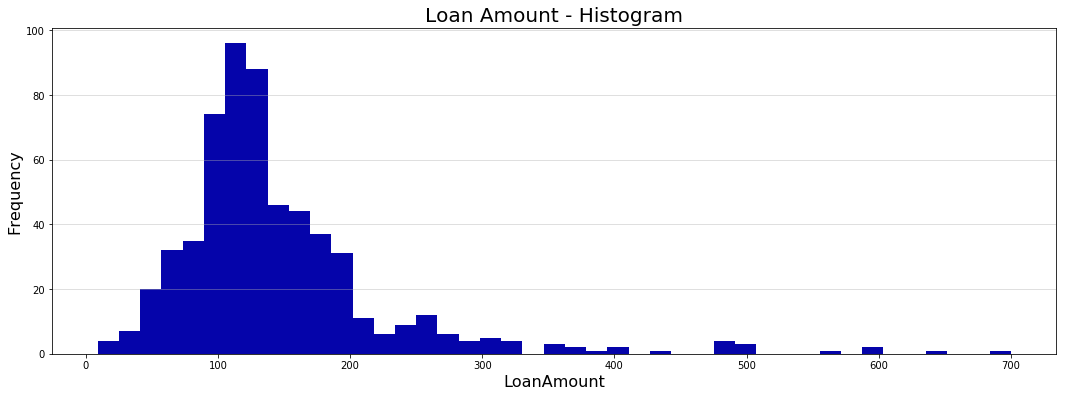

In [39]:
# Set plotting area/ size
plt.figure(figsize=(18,6))

# Plot histogram
plt.hist(x = loan_data['LoanAmount'].dropna(), bins=30, color='#0504aa')   # .dropna(). Missing values removed

# Set grid for X-axis
plt.grid(axis='y', alpha=0.5)

# Set X-axis label
plt.xlabel('LoanAmount', fontdict={'fontsize': 16, 'fontweight': 'medium'})

# Set Y-axis label
plt.ylabel('Frequency', fontdict={'fontsize': 16, 'fontweight': 'medium'})

# Set Histogram title
plt.title('Loan Amount - Histogram', fontdict={'fontsize': 20, 'fontweight': 'medium'})

#### Step: 1 - Extract subset of the main dataframe where LoanAmount value is missing (NAN) (Null Value Dataframe)

In [40]:
LoanAmount_null_df = loan_data[loan_data['LoanAmount'].isnull()]
LoanAmount_null_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


### Let us print the number of counts for each categorical feature from 'null value dataframe'. 
### This will help us understand which features needed in `group-by`

In [41]:
print ("Break-up of categorical values in the Null Dataframe:\n")
for col in LoanAmount_null_df:
    if col != 'Loan_ID' and loan_data[col].dtype == 'object':
        print ('\n' + col + ': ')
        print (LoanAmount_null_df[col].value_counts(dropna=False))

Break-up of categorical values in the Null Dataframe:


Gender: 
Male      19
Female     3
Name: Gender, dtype: int64

Married: 
Yes    14
No      7
NaN     1
Name: Married, dtype: int64

Dependents: 
0      11
1       4
2       3
3+      2
NaN     2
Name: Dependents, dtype: int64

Education: 
Graduate        15
Not Graduate     7
Name: Education, dtype: int64

Self_Employed: 
No     18
Yes     3
NaN     1
Name: Self_Employed, dtype: int64

Property_Area: 
Urban        11
Rural         6
Semiurban     5
Name: Property_Area, dtype: int64

Loan_Status: 
N    11
Y    11
Name: Loan_Status, dtype: int64


#### Analyze which columns can be grouped for `LoanAmount`

If you observe the above dataframe, the **Categorical features** 'Gender', 'Education', and 'Property_Area' **do not** have any missing values. So they are the potential features that can be used for `groupby'

#### Apply `groupby` using one or more features for `LoanAmount` and arrive at median/ mean etc. Analyze the stats and choose the appropriate measure.

#### As the Gender has just 3 females and the rest are males, adding `Gender` feature in `groupby` clause may not benefit much. So, let us issue `groupby` clause only with 'Education' and Property_Area'

#### Step: 2 - Create a 'filler dataframe' from "main dataframe" using `groupby` statement

In [42]:
# LoanAmount_filler_df = loan_data.groupby(['Education', 'Property_Area'])['LoanAmount'].agg([np.median, np.mean]).reset_index()

LoanAmount_filler_df = loan_data.groupby(['Education', 'Property_Area','Married'])['LoanAmount'].agg([np.median]).reset_index()
LoanAmount_filler_df

,Education,Property_Area,Married,median
0,Graduate,Rural,No,135.0
1,Graduate,Rural,Yes,150.0
2,Graduate,Semiurban,No,115.0
3,Graduate,Semiurban,Yes,137.5
4,Graduate,Urban,No,110.0
5,Graduate,Urban,Yes,130.0
6,Not Graduate,Rural,No,109.0
7,Not Graduate,Rural,Yes,130.0
8,Not Graduate,Semiurban,No,111.0
9,Not Graduate,Semiurban,Yes,108.0


#### Step: 3 - Rename the stats name to relevant feature name. In this case, rename `mean` to `LoanAmount`

In [43]:
# Rename the feature name from 'median' to 'LoanAmount'
LoanAmount_filler_df.rename(columns={'median': 'LoanAmount'}, inplace=True) 
LoanAmount_filler_df

,Education,Property_Area,Married,LoanAmount
0,Graduate,Rural,No,135.0
1,Graduate,Rural,Yes,150.0
2,Graduate,Semiurban,No,115.0
3,Graduate,Semiurban,Yes,137.5
4,Graduate,Urban,No,110.0
5,Graduate,Urban,Yes,130.0
6,Not Graduate,Rural,No,109.0
7,Not Graduate,Rural,Yes,130.0
8,Not Graduate,Semiurban,No,111.0
9,Not Graduate,Semiurban,Yes,108.0


#### Step: 4 - From 'null subset dataframe', extract the features that were used for `groupby` function, besides `LoanID` (as this will be used for merging of values later).

In [44]:
LoanAmount_null_df = LoanAmount_null_df[['Loan_ID', 'Education', 'Property_Area','Married']]
LoanAmount_null_df

,Loan_ID,Education,Property_Area,Married
0,LP001002,Graduate,Urban,No
35,LP001106,Graduate,Urban,Yes
63,LP001213,Graduate,Rural,Yes
81,LP001266,Graduate,Semiurban,Yes
95,LP001326,Graduate,Urban,No
102,LP001350,Graduate,Urban,Yes
103,LP001356,Graduate,Semiurban,Yes
113,LP001392,Graduate,Semiurban,No
127,LP001449,Graduate,Rural,No
202,LP001682,Not Graduate,Urban,Yes


#### Step: 5 - Merge the 'filler dataframe' (created using `groupby` statement) with the 'null subset dataframe'. <br>

#### Let us call this new dataframe as 'filled-in dataframe'

In [45]:
LoanAmount_filled_df = pd.merge(LoanAmount_null_df, LoanAmount_filler_df, 
                              left_on = ['Education', 'Property_Area','Married'], 
                              right_on = ['Education', 'Property_Area','Married'])

LoanAmount_filled_df

,Loan_ID,Education,Property_Area,Married,LoanAmount
0,LP001002,Graduate,Urban,No,110.0
1,LP001326,Graduate,Urban,No,110.0
2,LP001106,Graduate,Urban,Yes,130.0
3,LP001350,Graduate,Urban,Yes,130.0
4,LP002401,Graduate,Urban,Yes,130.0
5,LP002533,Graduate,Urban,Yes,130.0
6,LP001213,Graduate,Rural,Yes,150.0
7,LP001922,Graduate,Rural,Yes,150.0
8,LP002778,Graduate,Rural,Yes,150.0
9,LP001266,Graduate,Semiurban,Yes,137.5


#### Note that above are `Loan_IDs` for which the `LoanAmount` was missing. Now, we have arrived at the possible `LoanAmount` values!!!!<br>

#### Step: 6 - Finally merge the 'filled-in dataframe' with the main one.

In [46]:
# Step: 6a - Before merging the dataframe, make the unique ID fields as index fields in both the dataframes
loan_data = loan_data.set_index('Loan_ID') # Main dataframe
LoanAmount_filled_df = LoanAmount_filled_df.set_index('Loan_ID') # Newly created dataframe

# Step: 6b - Merge both the datAframes using index
loan_data.LoanAmount = loan_data.LoanAmount.fillna(LoanAmount_filled_df.LoanAmount)

# Step: 6c - Reset the index in the main dataframe after merging
loan_data = loan_data.reset_index()
loan_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,110.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


#### Print histogram to visualize the spread of the data (After NAN filling) 

0      110.0
1      128.0
2       66.0
3      120.0
4      141.0
5      267.0
6       95.0
7      158.0
8      168.0
9      349.0
10      70.0
11     109.0
12     200.0
13     114.0
14      17.0
15     125.0
16     100.0
17      76.0
18     133.0
19     115.0
20     104.0
21     315.0
22     116.0
23     112.0
24     151.0
25     191.0
26     122.0
27     110.0
28      35.0
29     120.0
       ...  
584    146.0
585    172.0
586    104.0
587     70.0
588     94.0
589    106.0
590     56.0
591    205.0
592    292.0
593    142.0
594    260.0
595    110.0
596    187.0
597     88.0
598    180.0
599    192.0
600    350.0
601    155.0
602    128.0
603    172.0
604    496.0
605    122.5
606    173.0
607    157.0
608    108.0
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64


Text(0.5, 1.0, 'Loan Amount - Histogram after NaN')

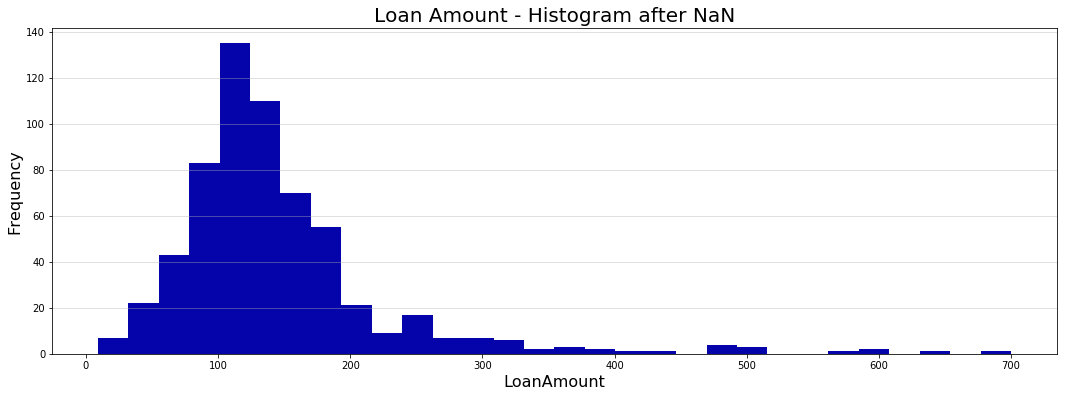

In [49]:
# Set plotting area/ size
plt.figure(figsize=(18,6))

print(loan_data['LoanAmount'])
# Plot histogram
plt.hist(x = loan_data['LoanAmount'], bins=30, color='#0504aa')  # Missing values filled-in

# Set grid for X-axis
plt.grid(axis='y', alpha=0.5)

# Set X-axis label
plt.xlabel('LoanAmount', fontdict={'fontsize': 16, 'fontweight': 'medium'})

# Set Y-axis label
plt.ylabel('Frequency', fontdict={'fontsize': 16, 'fontweight': 'medium'})

# Set Histogram title
plt.title('Loan Amount - Histogram after NaN', fontdict={'fontsize': 20, 'fontweight': 'medium'})

### Compare `LoanAmount` before and after filling NaNs

<img src="img/LoanAmountcomparison.png" width="700" height="500" >

### Let us consider  `Loan_Amount_Term` - (Numerical feature)

In [21]:
# Print the frequency of each values
print(loan_data['Loan_Amount_Term'].value_counts())
print("\nNo of NANs: ", len(loan_data['Loan_Amount_Term']) - loan_data['Loan_Amount_Term'].count())

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

No of NANs:  14


From the above frequency table, it is obvious that <b>360 months</b> is appearing more frequently than the other terms. So, it is appropriate to use the 360 months to fill the NAs

#### Fill all NAs with `mode` for `Loan_Amount_Term`

In [22]:
# NOTE: Whenever you take a mode of it, always use the first indexed value
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0], inplace=True)

In [23]:
# Print the frequency of each values
loan_data['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

### Let us consider `Credit_History` - (Numerical feature)

In [24]:
# Print the frequency of each values
print(loan_data['Credit_History'].value_counts())
print("\nNo of NANs: ", len(loan_data['Credit_History']) - loan_data['Credit_History'].count())

1.0    475
0.0     89
Name: Credit_History, dtype: int64

No of NANs:  50


#### Let us `groupby` `Gender` and `Education` to visualize the `Credit_History` distribution

In [57]:
# Print the married and unmarried people based on their gender
loan_data.groupby(['Gender', 'Married', 'Education',  'Credit_History'])['Credit_History'].count()  # 'Self_Employed',

Gender  Married  Education     Credit_History
Female  No       Graduate      0.0                11
                               1.0                48
                 Not Graduate  0.0                 2
                               1.0                12
        Yes      Graduate      0.0                 3
                               1.0                20
                 Not Graduate  0.0                 1
                               1.0                 3
Male    No       Graduate      0.0                15
                               1.0                83
                 Not Graduate  0.0                 4
                               1.0                24
        Yes      Graduate      0.0                32
                               1.0               221
                 Not Graduate  0.0                18
                               1.0                56
Name: Credit_History, dtype: int64

Irrespective of `Gender`, `Marital status`, or `Education`, the frequency of `Credit History` being 1 is more than 0. So, let us fill-in NANs of `Credit History` with 1.   

In [58]:
# NOTE: If you know the value to be filled-in, directly input them
loan_data['Credit_History'].fillna(1, inplace=True)

### Let us consider  `Gender`- (Categorical feature)

In [59]:
# Print the frequency of the each values
print(loan_data['Gender'].value_counts())
print("\nNo of NANs: ", len(loan_data['Gender']) - loan_data['Gender'].count())

Male      493
Female    112
Name: Gender, dtype: int64

No of NANs:  13


In [27]:
loan_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True)

In [60]:
# Print the frequency of the each values
print(loan_data['Gender'].value_counts())
print("\nNo of NANs: ", len(loan_data['Gender']) - loan_data['Gender'].count())

Male      493
Female    112
Name: Gender, dtype: int64

No of NANs:  13


### Let us consider  `Married`- (Categorical feature)

In [61]:
# Print the frequency of the each values
print(loan_data['Married'].value_counts())

print("\nNo of NANs: ", len(loan_data['Married']) - loan_data['Married'].count())

Yes    399
No     216
Name: Married, dtype: int64

No of NANs:  3


In the above result, there are 398 married people and 213 unmarried. At the same time, there are just 3 missing values found.
<br> <br>
One way to fill-in NAs is choosing `Yes` that occurs 398 times.
<br> <br>
But let us analyze little more by grouping the `Married` based on their `Gender`

#### Let us `groupby` `Gender` to visualize how many are `Married` and `Unmarried`

In [62]:
# Print the married and unmarried people based on their gender
print(loan_data.groupby(['Gender', 'Married'])['Married'].count())

Gender  Married
Female  No          80
        Yes         31
Male    No         133
        Yes        358
Name: Married, dtype: int64


The above table indicates that there are <b>more unmarried females</b> than married and <b>more married males</b> than unmarried. So it would be more appropriate to fill NAN as `Yes` for `Married` when the corresponding `Gender` is `Male` AND `No`  when the corresponding `Gender` is `Female`.

#### List the  rows where `Married` has `NAN` 

In [63]:
loan_data[loan_data['Married'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_dup,Education_dup
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y,3816,Graduate
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y,4758,Graduate
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y,10047,Graduate


#### Fill `NAN` of `Married` with `Yes` when `Gender` is `Male`

In [64]:
# ***NOTE: Pay attention to the brackets and "loc" command. ***

loan_data.loc[((loan_data['Married'].isnull()) & (loan_data['Gender'] == 'Male')), 'Married'] = 'Yes'

 #### Fill `NAN` of `Married` with `No` when `Gender` is `Female`

In [65]:
loan_data.loc[((loan_data['Married'].isnull()) & (loan_data['Gender'] == 'Female')), 'Married'] = 'No'

In [66]:
loan_data = loan_data.reset_index()

#### Let us cross-check whether the values are filled-in correctly. 

In [68]:
loan_data[loan_data['Loan_ID'].isin(['LP001357', 'LP001760', 'LP002393']) ]

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_dup,Education_dup
104,104,LP001357,Male,Yes,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y,3816,Graduate
228,228,LP001760,Male,Yes,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y,4758,Graduate
435,435,LP002393,Female,No,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y,10047,Graduate


### Let us consider  `Dependents`- (Categorical feature)

In [69]:
# Print the frequency of the each values
print(loan_data['Dependents'].value_counts())

print("\nNo of NANs: ", len(loan_data['Dependents']) - loan_data['Dependents'].count())

0     348
1     102
2     101
3+     52
Name: Dependents, dtype: int64

No of NANs:  15


If you notice that there are 51 applicants having 3 or more children. But it is denoted by '3+'. So let us first convert '3+' to 3. <br> <br>Further, this is an <b>`ordinal`</b> feature.

#### Convert `Dependents` feature's String value to Numerical  

In [70]:
loan_data.loc[loan_data['Dependents'] == '3+', 'Dependents'] = 3

#### List the rows where `Dependents` has `NAN` 

In [72]:
loan_data[loan_data['Dependents'].isnull()]

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_dup,Education_dup
102,102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y,13650,Graduate
104,104,LP001357,Male,Yes,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y,3816,Graduate
120,120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y,5667,Graduate
226,226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N,4735,Not Graduate
228,228,LP001760,Male,Yes,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y,4758,Graduate
293,293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N,5417,Graduate
301,301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y,2875,Not Graduate
332,332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y,2833,Graduate
335,335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y,5503,Graduate
346,346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N,3523,Not Graduate


#### Let us `groupby Married` to visualize the number of `Dependents`

In [73]:
# Print the no of dependents based on their Married status
print(loan_data.groupby(['Married', 'Dependents'])['Dependents'].count())

Married  Dependents
No       3               8
         0             173
         1              23
         2               8
Yes      3              44
         0             175
         1              79
         2              93
Name: Dependents, dtype: int64


#### As we visualize that 0 (Dependents) has more frequency for both married and unmarried, let us fill with 0

### Homework: Include `Gender` and `Education` as part of `groupby` function, analyze, and see if they can be used to fill-in the `Dependent` feature. If so, try filling-in using the 6 steps stated in `LoanAmount` filling.

In [44]:
loan_data.loc[loan_data['Dependents'].isnull(), ['Dependents'] ] = 0

#### Convert `Dependents` feature into Numeric from Categorical

In [45]:
loan_data['Dependents'] = loan_data.Dependents.astype(int)

In [46]:
loan_data.Dependents.value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

### Let us consider `Self_Employed` - (Categorical feature)

In [74]:
# Print the frequency of the each values
print(loan_data['Self_Employed'].value_counts())

print("\nNo of NANs: ", len(loan_data['Self_Employed']) - loan_data['Self_Employed'].count())

No     503
Yes     83
Name: Self_Employed, dtype: int64

No of NANs:  32


#### List the top 5 rows where `Self_Employed` has `NAN` 

In [75]:
loan_data[loan_data['Self_Employed'].isnull()].head()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_dup,Education_dup
11,11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y,2500,Graduate
19,19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y,2600,Graduate
24,24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,1.0,Semiurban,N,3717,Graduate
29,29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y,3750,Graduate
30,30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,1.0,Urban,N,4166,Graduate


#### Let us `groupby Gender` and `Education` to visualize the number of `Self_Employed`

In [76]:
# Print the no of Self Employed based on their Gender and Education
print(loan_data.groupby(['Gender', 'Education', 'Self_Employed'])['Self_Employed'].count())

Gender  Education     Self_Employed
Female  Graduate      No                75
                      Yes               11
        Not Graduate  No                14
                      Yes                4
Male    Graduate      No               309
                      Yes               51
        Not Graduate  No                96
                      Yes               13
Name: Self_Employed, dtype: int64


In the above table, if you notice that 
- there are 75 graduate - female applicants who are NOT self-employed when compared to 11 self-employed
- there are 14 non-graduate - female applicants who are NOT self-employed when compared to 4 self-employed
<br>Likewise
- there are 314 graduate - male applicants who are NOT self-employed when compared to mere 54 self-employed
- there are 97 non-graduate - male applicants who are NOT self-employed when compared to 13 self-employed
<br> So, irrespective of whether the applicant is `Graduate` or not, the **Self_Employed = NO** has more frequency. 

#### In other words, the `Graduate` feature does not have any significance.

#### Let us `groupby Gender` and `Married` to visualize the number of `Self_Employed`

In [50]:
# Print the no of Self Employed based on their Gender and Married
print(loan_data.groupby(['Gender', 'Married', 'Self_Employed'])['Self_Employed'].count())

Gender  Married  Self_Employed
Female  No       No                64
                 Yes               11
        Yes      No                25
                 Yes                4
Male    No       No               108
                 Yes               17
        Yes      No               303
                 Yes               50
Name: Self_Employed, dtype: int64


In the above table, if you notice that 
- there are 64 unmarried-female applicants who are NOT self-employed when compared to 11 self-employed
- there are 25 married-female applicants who are NOT self-employed when compared to 4 self-employed
<br>Likewise
- there are 108 unmarried-male applicants who are NOT self-employed when compared to mere 17 self-employed
- there are 303 married-male applicants who are NOT self-employed when compared to 50 self-employed
<br> So, irrespective of whether the applicant is `Married` or not, the **Self_Employed = NO** has more frequency. 

#### In other words, the `Married` feature does not have any significance.
<br> <br> <br>

Further, I do not think we can consider any other field to determine the `Self_Employed` feature. So let us fill NAN of `Self_Employed` with `No`

#### As we concluded earlier, let us fill NaNs of `Self_Employed` with `No`

In [77]:
loan_data.loc[loan_data['Self_Employed'].isnull(), ['Self_Employed'] ] = 'No'

In [78]:
loan_data.Self_Employed.value_counts()

No     535
Yes     83
Name: Self_Employed, dtype: int64

### Now let us check whether the dataframe has any NAN values 

In [55]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**NOTE: From the above table, it is evident that all the missing values are filled-in. 
<br> It is always recommended to store the dataframe filled-in with NAs so that we need not do the above exercise every time.**

### Save the data in a dataframe before proceeding further

In [79]:
loan_data.to_csv("LoanData_NoNan.csv", index=False)

# =============================================================
# Going forward, we will be using the data from `LoanData_NoNan.csv` only.
# =============================================================

In [80]:
loan_data = pd.read_csv('LoanData_NoNan.csv')
print('Shape of the Data', loan_data.shape)
loan_data.head()

Shape of the Data (618, 16)


,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_dup,Education_dup
0,0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849,Graduate
1,1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4583,Graduate
2,2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000,Graduate
3,3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,2583,Not Graduate
4,4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000,Graduate
